In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob

from astropy import units as u
from astropy import constants as c
from astropy.io import fits

%matplotlib inline

In [284]:
sns.color_palette('muted').reverse()
sns.set_context('talk')
sns.set_style("darkgrid")

# Inspecting the data

###### filename breakdown example: LBL_A30_s0_w035_R_300000

###### Line-by-Line_Airmass 3.0_s0_3.5mm of PWV (precitable water vapor)_R_resolution

###### lam ranges from 0.3 to 30 um (300 - 30000 nm) (~ UVC - microwave)

###### lam in base units of um

In [278]:
hdu_list = fits.open('./data/LBL_A10_s0_w200_R0300000_T.fits')
hdu_data = hdu_list[1].data
hdu_list.close()

## Entire sample spectra

In [279]:
lam   = hdu_data['lam']
trans = hdu_data['trans']

## Section of spectra

#### Using a section of the spectra for now will speed up tests

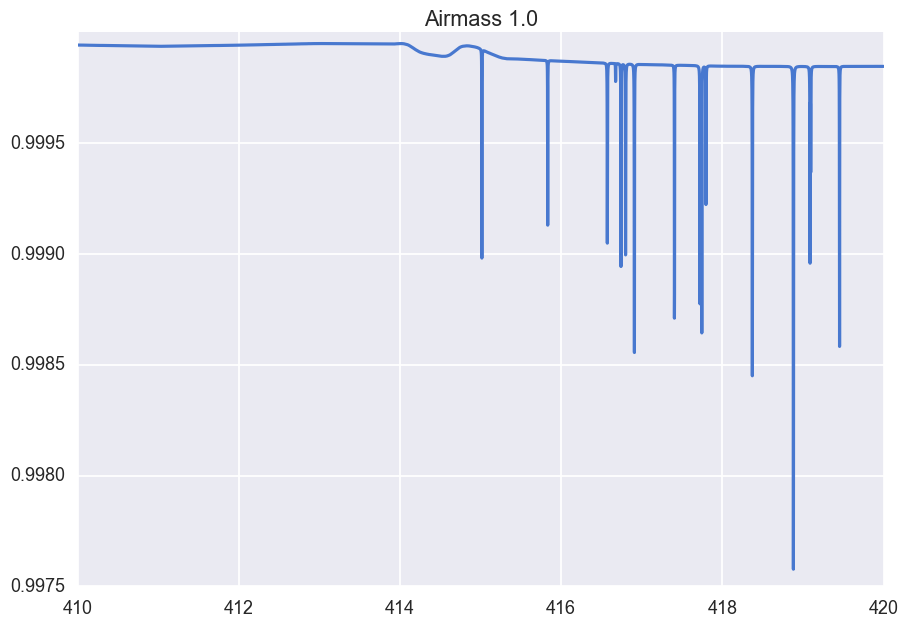

In [285]:
# just using 410 - 420 nanometers for now
lam_bin = lam[(0.41 <= lam) & (lam <= 0.42)]
trans_bin = trans[(0.41 <= lam) & (lam <= 0.42)]
plt.plot(lam_bin*1E3, trans_bin)

plt.title('Airmass 1.0')

# Generalizing to multiple spectra now

## To make a time series, the same library with different airmasses will be used to simulate the amount of water vapor changing with time. 
## The mm of water vapor will remain set at 20 mm for now for each airmass.

In [206]:
pathnames = glob.glob('./data/*')

In [340]:
# Will hold airmass 1.0 ... 3.0
lam_list   = []
trans_list = []

# holds binned values
lam_bin_list   = [] # [am=1.0, am=1.5, ..., am=3.0]
trans_bin_list = []

for i in pathnames:
    hdu_list = fits.open(i)
    hdu_data = hdu_list[1].data
    hdu_list.close()
    
    lam   = hdu_data['lam']
    trans = hdu_data['trans']
    
    lam_list.append(lam)
    trans_list.append(trans)
    
    # just cut out a piece to analyze for now
    lam_bin = lam[(0.41 <= lam) & (lam <= 0.42)]
    trans_bin = trans[(0.41 <= lam) & (lam <= 0.42)] 
    
    lam_bin_list.append(lam_bin)
    trans_bin_list.append(trans_bin)

## Here is what the five different airmasses being used look like relative to each other for this set bin

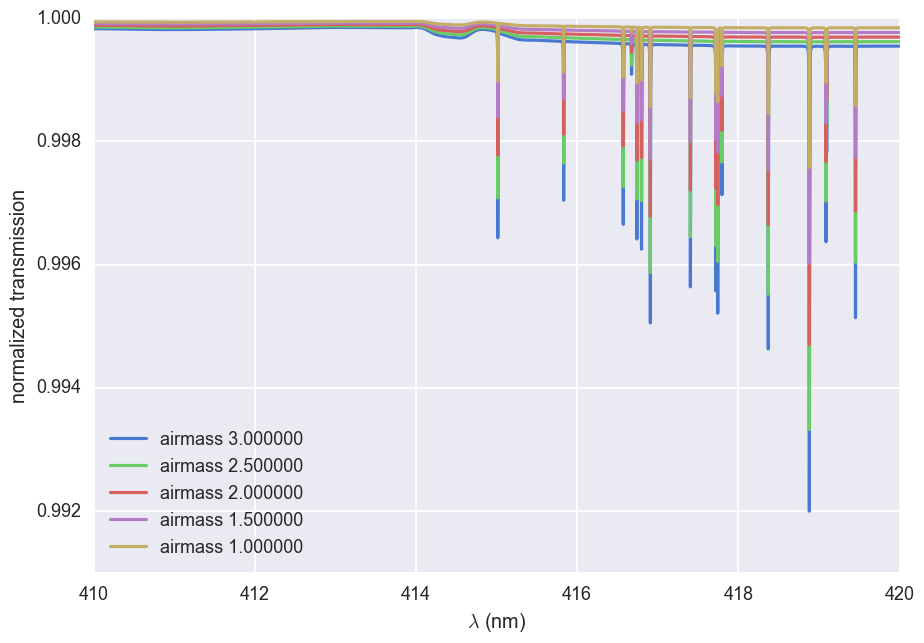

In [286]:
am_list = [1.0, 1.5, 2.0, 2.5, 3.0]
for i,j in enumerate(reversed(am_list)): # to make overlapping easier to see
    i=i+1
    plt.plot(lam_bin_list[-i]*1E3, trans_bin_list[-i], label='airmass %f' % j)
    
plt.legend(loc='best')
#plt.ylim(0.998, 1)
#plt.xlim(410, 415)

plt.xlabel(r'$\lambda$ (nm)')
plt.ylabel('normalized transmission')

## This bin is definitely too large. Next, it will be decreased until it is on the order of the distance between the most closlely packed features.

## Next, a synthetic timeseries of flux over time for a given wavelength bin can be created by randomly selecting an airmass spectra and extracting the flux for a given binsize.

## For now, just 50 randomly chosen spectra will be used

In [287]:
import random 

### Plot preview

('binsize (nm): ', 10.0)
('flux average over bin: ', 0.99989026046638874)
('STD: ', 8.9412290513296759e-05)


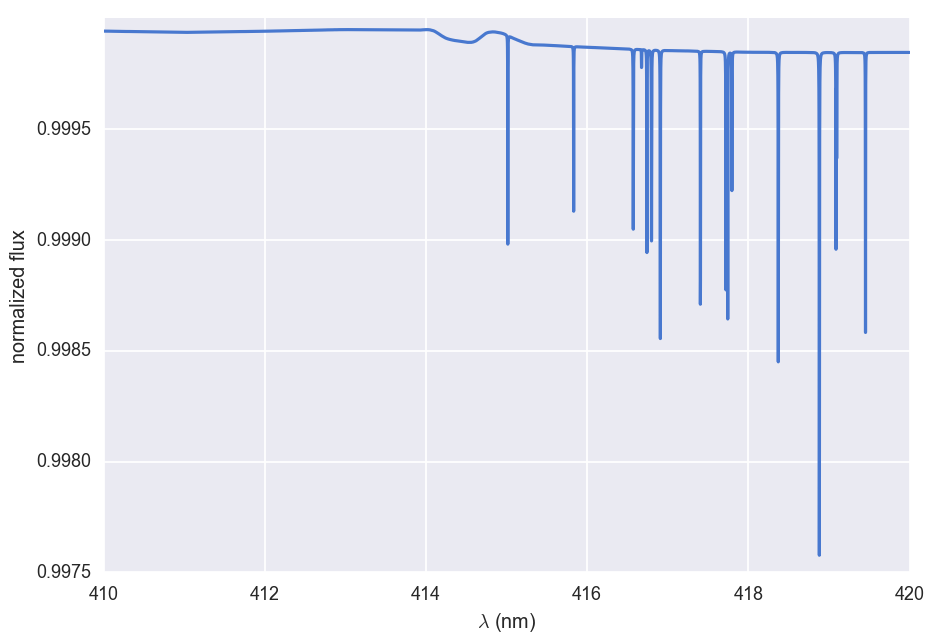

In [403]:
binsize = 10 * 1E-3 # binsize in nanometers converted back to base micrometer units

lam_bin = lam_list[0][(0.41 <= lam) & (lam <= 0.41 + binsize)]
# doesn't matter which lam_list, they're all the same

trans_n = trans_list[0] # will be randomized next
trans_bin = trans_n[(0.41 <= lam) & (lam <= 0.41 + binsize)] 

flux_avg = np.mean(trans_bin)
print('binsize (nm): ', binsize*1E3)
print('flux average over bin: ', flux_avg)
print('STD: ', np.std(trans_bin))

plt.plot(lam_bin*1E3, trans_bin)

plt.xlabel(r'$\lambda$ (nm)')
plt.ylabel('normalized flux')

## testing with smaller binsize

('binsize (nm): ', 0.1)
('flux average over bin: ', 0.99994195474429237)
('STD: ', 1.4261409016264125e-07)


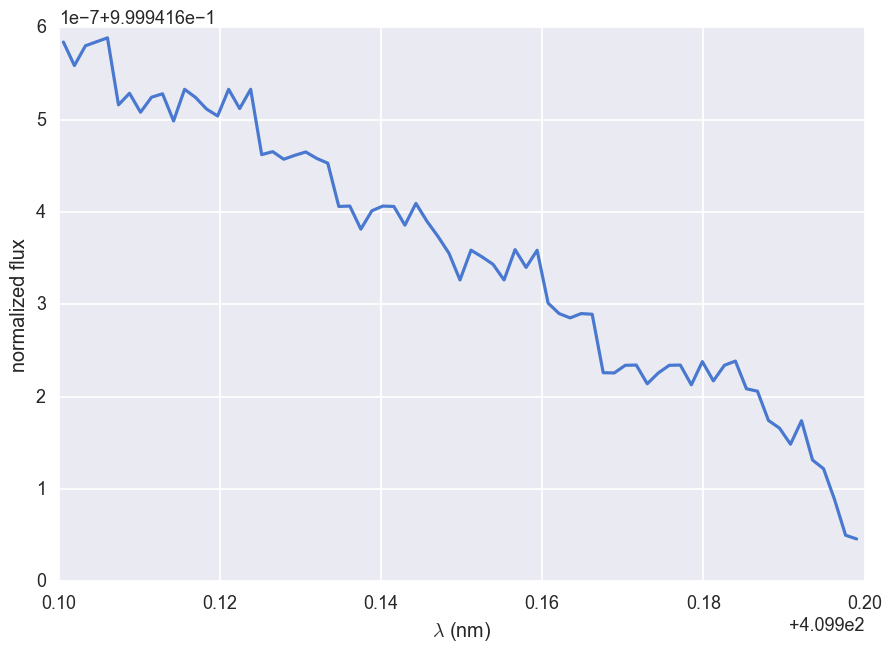

In [404]:
binsize = .1 * 1E-3 # binsize in nanometers converted back to base micrometer units

lam_bin = lam_list[0][(0.41 <= lam) & (lam <= 0.41 + binsize)]
# doesn't matter which lam_list, they're all the same

trans_n = trans_list[0] # will be randomized next
trans_bin = trans_n[(0.41 <= lam) & (lam <= 0.41 + binsize)] 

flux_avg = np.mean(trans_bin)
print('binsize (nm): ', binsize*1E3)
print('flux average over bin: ', flux_avg)
print('STD: ', np.std(trans_bin))

plt.plot(lam_bin*1E3, trans_bin)

plt.xlabel(r'$\lambda$ (nm)')
plt.ylabel('normalized flux')

## Decreasing the binsize definitely has a noticeable decrease in the standard deviation of the flux over that interval

## Randomizing selection

In [405]:
N = 50
binsize = .1 * 1E-3 # binsize in nanometers converted back to base micrometer units

lam_bin = lam_list[0][(0.41 <= lam) & (lam <= 0.41 + binsize)]
flux_avg_list = []
for i in range(N):
    trans_n = random.choice(trans_list) # pick random spectra from list of 5 (airmasses)
    
    # set bin
    trans_bin = trans_n[(0.41 <= lam) & (lam <= 0.41 + binsize)] 

    # get representative flux for that bin
    flux_avg = np.mean(trans_bin)
    
    flux_avg_list.append(flux_avg)

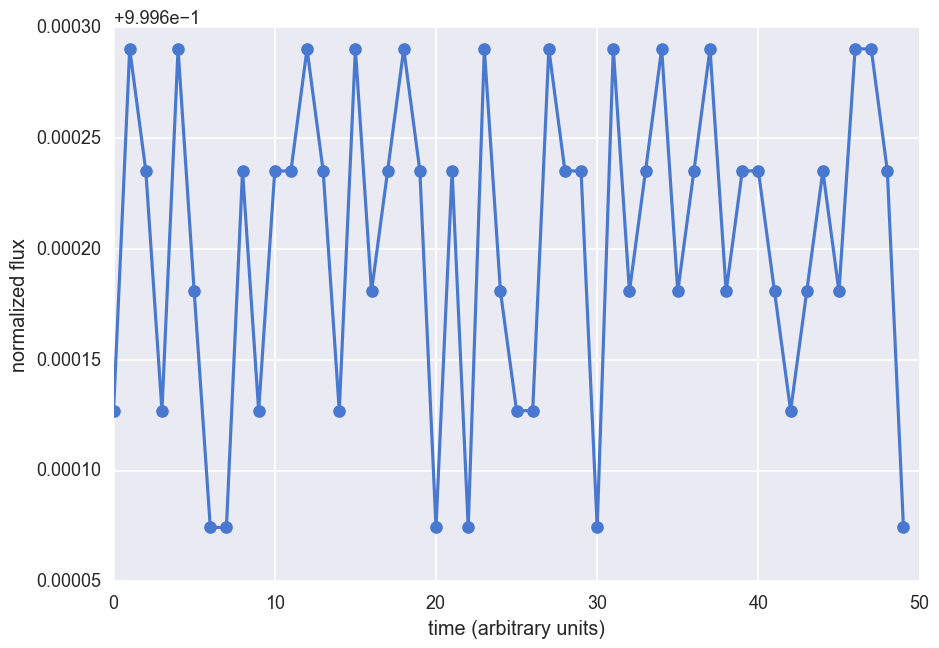

In [407]:
plt.plot(flux_list, '-o')

plt.xlabel('time (arbitrary units)')
plt.ylabel('normalized flux')